In [1]:
# Cài đặt thư viện cần thiết
!pip install datasets scikit-learn pandas numpy matplotlib joblib

import pandas as pd
import numpy as np
import joblib
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system ==

In [2]:
# Hàm tải dataset từ Hugging Face

def load_dataset_from_hf(dataset_name, split='train'):
    dataset = load_dataset(dataset_name, split=split)
    return pd.DataFrame(dataset)

In [3]:

# Hàm hỗ trợ

def preprocess_and_train(data, text_column, label_column, task_name):
    label_counts = data[label_column].value_counts()
    if len(label_counts) < 2:
        print(f"Cảnh báo: Dữ liệu '{task_name}' chỉ chứa một lớp, cần kiểm tra lại!")
        return {}, None, {}

    X_train, X_test, y_train, y_test = train_test_split(
        data[text_column], data[label_column], test_size=0.2, random_state=42
    )

    vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    models = {
        'Naive Bayes': MultinomialNB(),
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'SVM': LinearSVC(max_iter=1000)
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        print(f'{task_name} - {name} Accuracy: {accuracy:.4f}')

    return results, vectorizer, models

def plot_results(results_dict):
    fig, ax = plt.subplots(figsize=(10, 6))
    for dataset, accuracies in results_dict.items():
        ax.plot(list(accuracies.keys()), list(accuracies.values()), marker='o', label=dataset)
    ax.set_title('So sánh Độ chính xác của các Mô hình trên các Tập dữ liệu')
    ax.set_xlabel('Mô hình')
    ax.set_ylabel('Độ chính xác')
    ax.legend()
    plt.grid(True)
    plt.savefig(os.path.join(MODEL_DIR, 'model_comparison.png'))
    plt.show()

In [4]:
# Tải dữ liệu từ Hugging Face
imdb_df = load_dataset_from_hf('imdb')
imdb_results, imdb_vectorizer, imdb_models = preprocess_and_train(imdb_df, 'text', 'label', 'IMDB Reviews')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

IMDB Reviews - Naive Bayes Accuracy: 0.8496
IMDB Reviews - Logistic Regression Accuracy: 0.8840
IMDB Reviews - SVM Accuracy: 0.8712


In [5]:
ag_news_df = load_dataset_from_hf('ag_news')
ag_news_results, ag_news_vectorizer, ag_news_models = preprocess_and_train(ag_news_df, 'text', 'label', 'AG News')

README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

AG News - Naive Bayes Accuracy: 0.8942
AG News - Logistic Regression Accuracy: 0.9073
AG News - SVM Accuracy: 0.9066


In [6]:
twitter_df = load_dataset_from_hf('sentiment140', split='train[:50000]')
twitter_df['label'] = twitter_df['sentiment'].map({0: 0, 4: 1})
twitter_results, twitter_vectorizer, twitter_models = preprocess_and_train(twitter_df, 'text', 'label', 'Twitter Sentiment')

README.md:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

sentiment140.py:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

The repository for sentiment140 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/sentiment140.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/1600000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/498 [00:00<?, ? examples/s]

Cảnh báo: Dữ liệu 'Twitter Sentiment' chỉ chứa một lớp, cần kiểm tra lại!


In [7]:
sms_df = load_dataset_from_hf('sms_spam')
sms_results, sms_vectorizer, sms_models = preprocess_and_train(sms_df, 'sms', 'label', 'SMS Spam')

README.md:   0%|          | 0.00/4.98k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/359k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5574 [00:00<?, ? examples/s]

SMS Spam - Naive Bayes Accuracy: 0.9767
SMS Spam - Logistic Regression Accuracy: 0.9704
SMS Spam - SVM Accuracy: 0.9830


In [8]:
bbc_df = load_dataset_from_hf('ag_news')
bbc_df['label'] = bbc_df['label'].factorize()[0]
bbc_results, bbc_vectorizer, bbc_models = preprocess_and_train(bbc_df, 'text', 'label', 'BBC News')

BBC News - Naive Bayes Accuracy: 0.8942
BBC News - Logistic Regression Accuracy: 0.9073
BBC News - SVM Accuracy: 0.9066


In [9]:
yelp_df = load_dataset_from_hf('yelp_review_full', split='train[:10000]')
yelp_results, yelp_vectorizer, yelp_models = preprocess_and_train(yelp_df, 'text', 'label', 'Yelp Reviews')

README.md:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/299M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Yelp Reviews - Naive Bayes Accuracy: 0.4460
Yelp Reviews - Logistic Regression Accuracy: 0.5000
Yelp Reviews - SVM Accuracy: 0.4560


In [10]:
import os

In [11]:
# Tạo thư mục lưu mô hình
MODEL_DIR = "models"
os.makedirs(MODEL_DIR, exist_ok=True)

In [12]:
# Lưu mô hình và vectorizer vào thư mục models
def save_models(models, vectorizer, name):
    joblib.dump(vectorizer, os.path.join(MODEL_DIR, f'{name}_vectorizer.pkl'))
    for model_name, model in models.items():
        joblib.dump(model, os.path.join(MODEL_DIR, f'{name}_{model_name}.pkl'))

save_models(imdb_models, imdb_vectorizer, 'IMDB_Reviews')
save_models(ag_news_models, ag_news_vectorizer, 'AG_News')
save_models(twitter_models, twitter_vectorizer, 'Twitter_Sentiment')
save_models(sms_models, sms_vectorizer, 'SMS_Spam')
save_models(bbc_models, bbc_vectorizer, 'BBC_News')
save_models(yelp_models, yelp_vectorizer, 'Yelp_Reviews')


IMDB Reviews:
  Naive Bayes: 0.8496
  Logistic Regression: 0.8840
  SVM: 0.8712

AG News:
  Naive Bayes: 0.8942
  Logistic Regression: 0.9073
  SVM: 0.9066

Twitter Sentiment:

SMS Spam:
  Naive Bayes: 0.9767
  Logistic Regression: 0.9704
  SVM: 0.9830

BBC News:
  Naive Bayes: 0.8942
  Logistic Regression: 0.9073
  SVM: 0.9066

Yelp Reviews:
  Naive Bayes: 0.4460
  Logistic Regression: 0.5000
  SVM: 0.4560


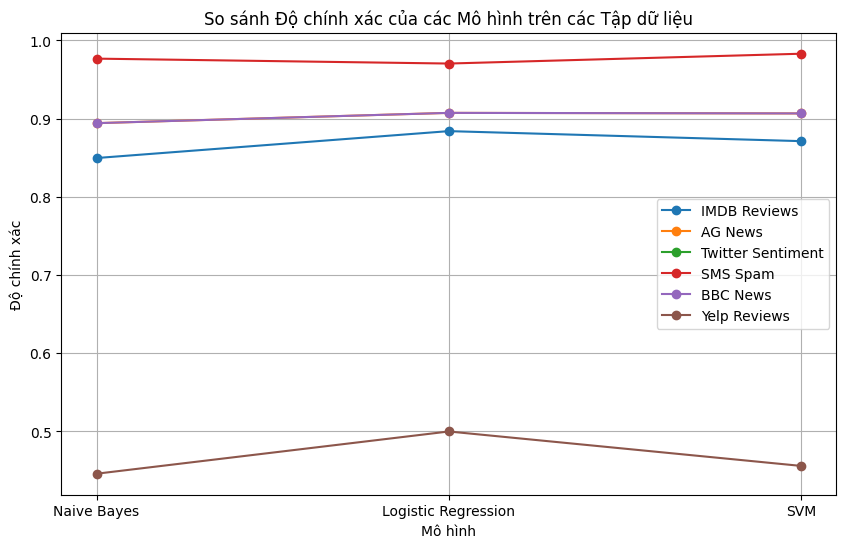

In [13]:


# So sánh kết quả
results_dict = {
    'IMDB Reviews': imdb_results,
    'AG News': ag_news_results,
    'Twitter Sentiment': twitter_results,
    'SMS Spam': sms_results,
    'BBC News': bbc_results,
    'Yelp Reviews': yelp_results
}

for dataset, accuracies in results_dict.items():
    print(f'\n{dataset}:')
    for model, acc in accuracies.items():
        print(f'  {model}: {acc:.4f}')

plot_results(results_dict)


In [14]:
# import shutil

# # Nén thư mục models thành một file zip
# shutil.make_archive("models", 'zip', "models")

# # Tải về từ Colab
# from google.colab import files
# files.download("models.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# import joblib
# import os

# # Load the models and vectorizers
# MODEL_DIR = "models"  # Assuming your models are saved in the 'models' directory

# def load_model_and_vectorizer(dataset_name, model_name):
#     vectorizer = joblib.load(os.path.join(MODEL_DIR, f'{dataset_name}_vectorizer.pkl'))
#     model = joblib.load(os.path.join(MODEL_DIR, f'{dataset_name}_{model_name}.pkl'))
#     return model, vectorizer

# # Choose a dataset and model for testing
# dataset_name = 'IMDB_Reviews'  # Change to your desired dataset
# model_name = 'Naive Bayes'  # Change to your desired model

# model, vectorizer = load_model_and_vectorizer(dataset_name, model_name)

# # Test cases
# test_cases = [
#     "This movie was amazing! I loved it.",  # Positive sentiment
#     "The acting was terrible and the plot was boring.",  # Negative sentiment
#     "It was an okay movie, nothing special.",  # Neutral sentiment
#     "I'm not sure how I feel about this film.",  # Ambiguous sentiment
#     "The special effects were great, but the story was weak.",  # Mixed sentiment
#     "This product is a piece of garbage! Don't waste your money.", # Negative for product review
#     "The food was delicious and the service was excellent!", # Positive for restaurant review
#     "This new phone is really cool and easy to use.", # Positive for product review
# ]

# # Predict and print results
# for text in test_cases:
#     # Preprocess the input text
#     text_tfidf = vectorizer.transform([text])

#     # Make prediction
#     prediction = model.predict(text_tfidf)[0]

#     # Print results
#     print(f"Text: {text}")
#     if dataset_name == 'IMDB_Reviews':
#         print(f"Predicted Sentiment: {'Positive' if prediction == 1 else 'Negative'}")
#     elif dataset_name == 'AG_News':
#         print(f"Predicted Class: {prediction}") # You'll need to interpret the class labels
#     # Add similar output for other datasets
#     print("-" * 20)

Text: This movie was amazing! I loved it.
Predicted Sentiment: Positive
--------------------
Text: The acting was terrible and the plot was boring.
Predicted Sentiment: Negative
--------------------
Text: It was an okay movie, nothing special.
Predicted Sentiment: Negative
--------------------
Text: I'm not sure how I feel about this film.
Predicted Sentiment: Negative
--------------------
Text: The special effects were great, but the story was weak.
Predicted Sentiment: Negative
--------------------
Text: This product is a piece of garbage! Don't waste your money.
Predicted Sentiment: Negative
--------------------
Text: The food was delicious and the service was excellent!
Predicted Sentiment: Positive
--------------------
Text: This new phone is really cool and easy to use.
Predicted Sentiment: Negative
--------------------


In [16]:
# # Đoạn mã này giả định rằng bạn đã chạy đoạn mã trước đó trong cùng một phiên Colab
# # và các biến `model`, `vectorizer`, `dataset_name` đã được tải và tồn tại.

# # Input mới
# new_input = "i love vietnam"

# # 1. Tiền xử lý input mới bằng vectorizer đã tải
# #    Lưu ý: vectorizer.transform() yêu cầu đầu vào là một iterable (ví dụ: list)
# new_input_tfidf = vectorizer.transform([new_input])

# # 2. Dự đoán bằng mô hình đã tải
# #    model.predict() trả về một mảng, lấy phần tử đầu tiên [0] cho dự đoán của input đơn lẻ này
# new_prediction = model.predict(new_input_tfidf)[0]

# # 3. In kết quả (sử dụng lại logic kiểm tra dataset_name từ đoạn mã trước)
# print(f"Input Text: {new_input}")
# if dataset_name == 'IMDB_Reviews':
#   predicted_sentiment = 'Positive' if new_prediction == 1 else 'Negative'
#   print(f"Predicted Sentiment: {predicted_sentiment}")
# elif dataset_name == 'AG_News':
#    # Logic cho AG_News nếu cần
#    print(f"Predicted Class: {new_prediction}")
# # Thêm các nhánh elif cho các dataset khác nếu có
# print("-" * 20)

# # Phân tích kết quả có thể xảy ra:
# # Mặc dù "love" là một từ tích cực mạnh, từ "vietnam" không có khả năng xuất hiện
# # thường xuyên hoặc không mang ý nghĩa cảm xúc cụ thể trong tập dữ liệu đánh giá phim IMDB.
# # Do đó, mô hình có thể dự đoán là "Negative" hoặc "Positive" tùy thuộc vào trọng số TF-IDF
# # của từ "love" và các từ khác (hoặc thiếu các từ khác) dựa trên những gì nó đã học từ đánh giá phim.
# # Kết quả này một lần nữa nhấn mạnh vấn đề "Không khớp miền" (Domain Mismatch).

Input Text: i love vietnam
Predicted Sentiment: Positive
--------------------
